# LSE CHANGEMAKERS
Andres Oats Garcia and Rohan Prakash

In [2]:
#import modules
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns #for nicer plots
from sklearn.linear_model import LinearRegression #to retrieve regression coefficients

#set up seaborn
sns.set_theme()
sns.set_palette('Dark2') #Dark2, PuOr, RdBu


## EC201 LT AND ST

In [3]:
#import dataset
EC201_LT = pd.read_excel('EC201 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC201_LT.columns = EC201_LT.iloc[0]
EC201_LT = EC201_LT.drop(0)
EC201_LT = EC201_LT.drop('groups', axis =1)
EC201_LT = EC201_LT.fillna(0)


EC201_LT['days online'] = EC201_LT['days online'].astype(int)
EC201_LT['views'] = EC201_LT['views'].astype(int)
EC201_LT['contributions'] = EC201_LT['contributions'].astype(int)
EC201_LT['questions'] = EC201_LT['questions'].astype(int)
EC201_LT['notes'] = EC201_LT['notes'].astype(int)
EC201_LT['answers'] = EC201_LT['answers'].astype(int)
EC201_LT['endorsed answers'] = EC201_LT['endorsed answers'].astype(int)


EC201_LT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,0,0,0,0,0,0,0
2,Instructor,37,594,33,0,0,29,0
3,Instructor,55,633,426,0,19,259,0
4,Instructor,17,42,3,0,0,3,0
5,Instructor,59,110,19,0,3,8,0


In [4]:
EC201_LT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,20.715582,88.464448,3.440242,0.918306,0.036309,1.580938,0.829047
std,29.265258,147.528469,26.637718,3.289927,0.749877,19.465000,13.032342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,166.000000,633.000000,426.000000,39.000000,19.000000,347.000000,273.000000


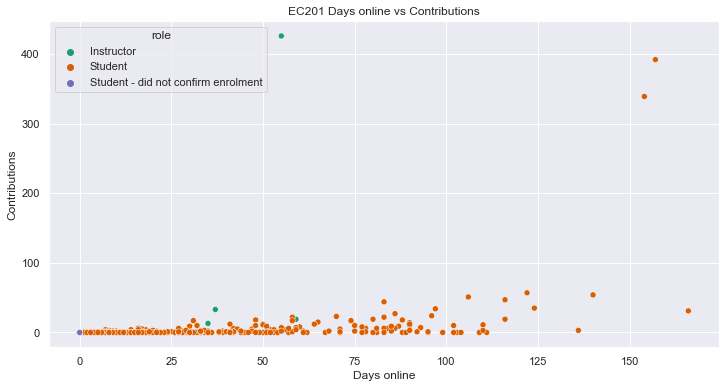

In [5]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC201_LT)

plt.title("EC201 Days online vs Contributions")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


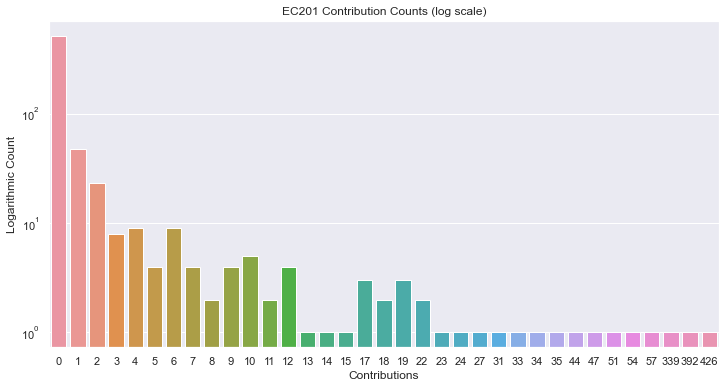

In [6]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC201_LT)

plt.yscale('log')
plt.title("EC201 Contribution Counts (log scale)")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


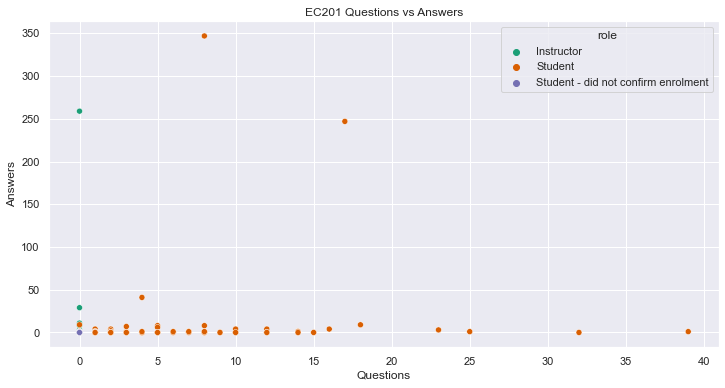

In [7]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC201_LT)

plt.title("EC201 Questions vs Answers")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


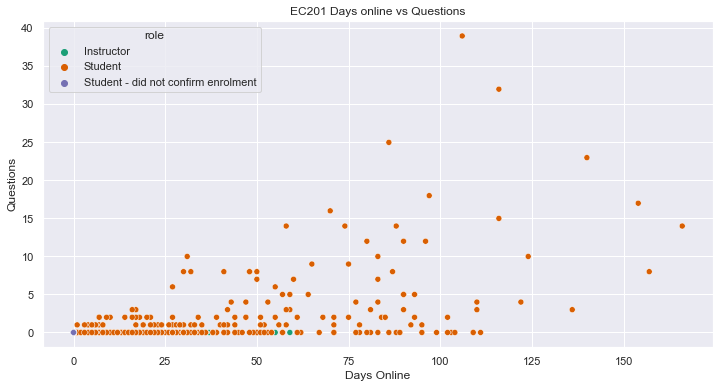

In [8]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC201_LT)

plt.title("EC201 Days online vs Questions")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


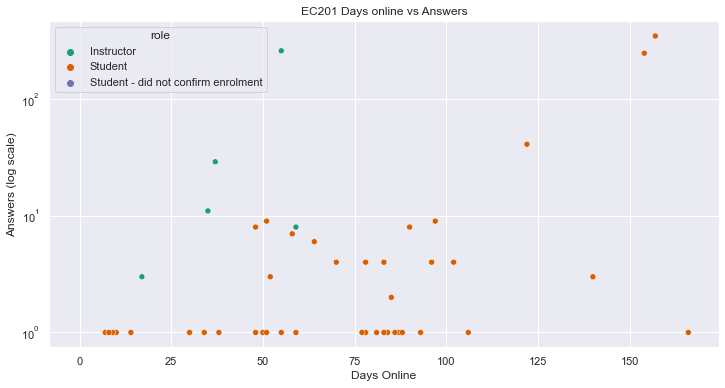

In [9]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC201_LT)

plt.title("EC201 Days online vs Answers")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


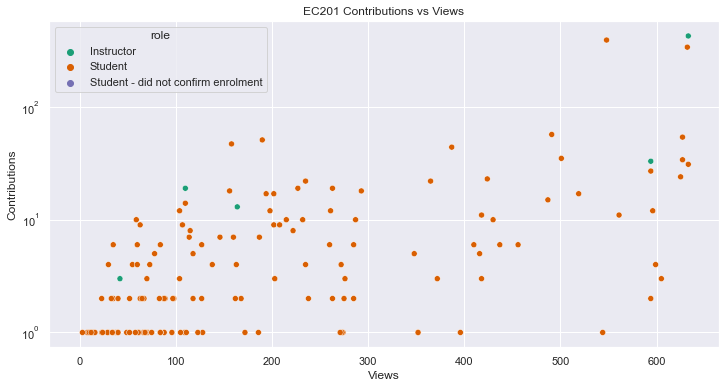

In [10]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='role', data=EC201_LT)

plt.title("EC201 Contributions vs Views")

plt.yscale("log")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


## EC201 MT

In [11]:
#import dataset
EC201_MT = pd.read_excel('EC201 - MT - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC201_MT.columns = EC201_MT.iloc[0]
EC201_MT = EC201_MT.drop(0)
EC201_MT = EC201_MT.drop('groups', axis =1)
EC201_MT = EC201_MT.fillna(0)


EC201_MT['days online'] = EC201_MT['days online'].astype(int)
EC201_MT['views'] = EC201_MT['views'].astype(int)
EC201_MT['contributions'] = EC201_MT['contributions'].astype(int)
EC201_MT['questions'] = EC201_MT['questions'].astype(int)
EC201_MT['notes'] = EC201_MT['notes'].astype(int)
EC201_MT['answers'] = EC201_MT['answers'].astype(int)
EC201_MT['endorsed answers'] = EC201_MT['endorsed answers'].astype(int)



EC201_MT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,2,9,4,0,0,3,0
2,Instructor,87,649,20,0,0,19,0
3,Instructor,75,653,116,0,27,57,0
4,Instructor,24,75,16,0,0,14,0
5,Instructor,140,655,711,2,58,418,0


In [12]:
EC201_MT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,28.132730,90.051282,3.491704,0.871795,0.134238,1.467572,0.377074
std,37.678364,148.826874,31.048196,3.433464,2.484104,19.195176,6.333831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.500000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,242.000000,658.000000,711.000000,42.000000,58.000000,418.000000,158.000000


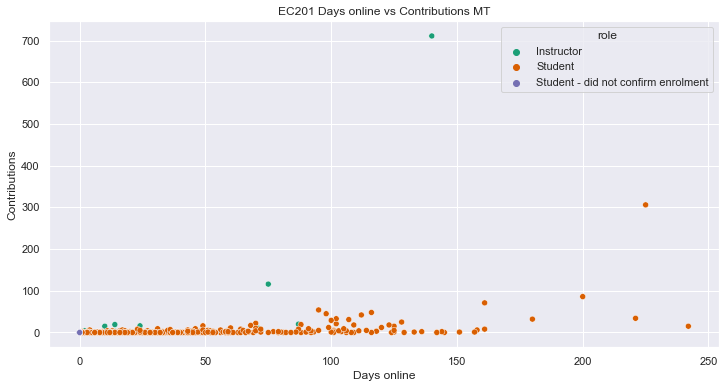

In [13]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC201_MT)

plt.title("EC201 Days online vs Contributions MT")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


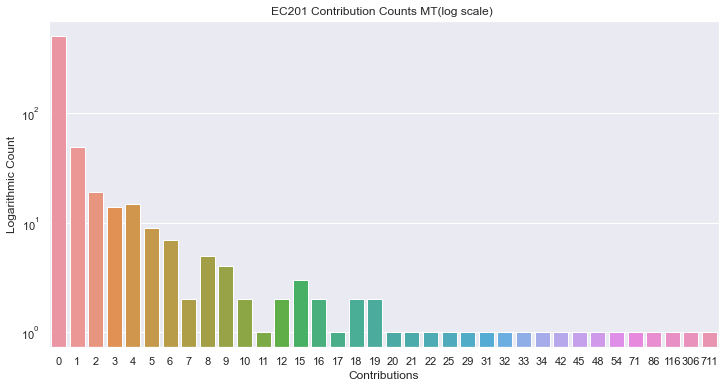

In [14]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC201_MT)

plt.yscale('log')
plt.title("EC201 Contribution Counts MT(log scale) ")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


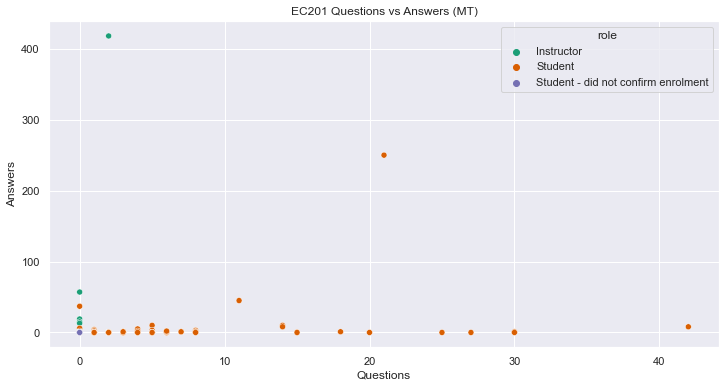

In [15]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC201_MT)

plt.title("EC201 Questions vs Answers (MT)")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


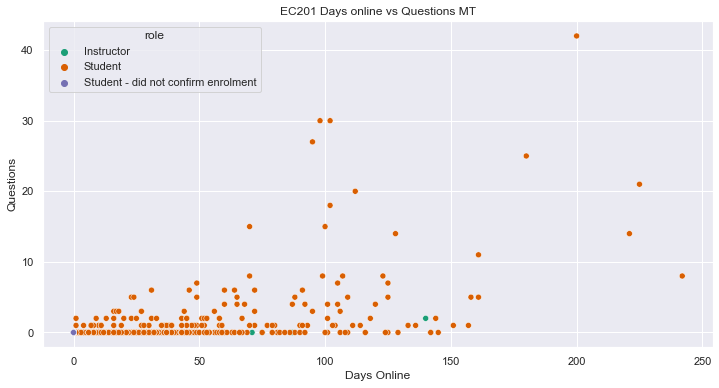

In [16]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC201_MT)

plt.title("EC201 Days online vs Questions MT")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


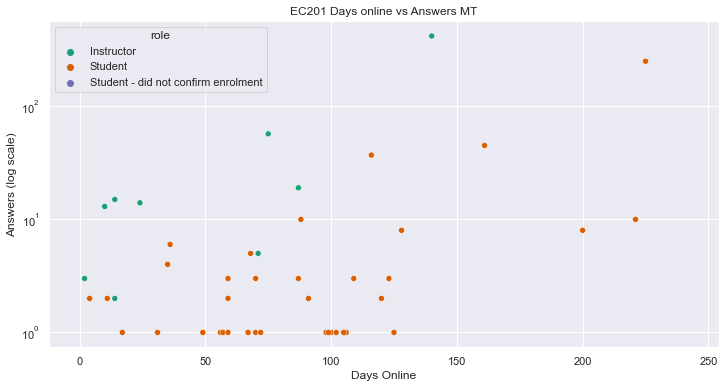

In [17]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC201_MT)

plt.title("EC201 Days online vs Answers MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


## Comparing across terms

In [19]:
EC201_LT["Term"] = "LT"
EC201_MT["Term"] = "MT"

EC201_combine = pd.concat([EC201_MT, EC201_LT], ignore_index=True)
EC201_combine.head()

,role,days online,views,contributions,questions,notes,answers,endorsed answers,Term
0,Instructor,2,9,4,0,0,3,0,MT
1,Instructor,87,649,20,0,0,19,0,MT
2,Instructor,75,653,116,0,27,57,0,MT
3,Instructor,24,75,16,0,0,14,0,MT
4,Instructor,140,655,711,2,58,418,0,MT


Relatively similar distributions between the two terms.

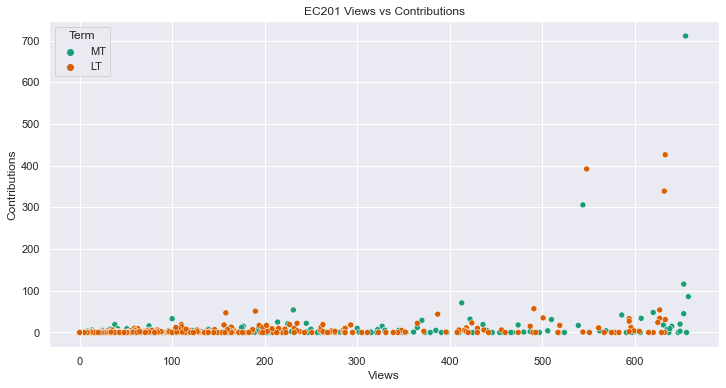

In [22]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='Term', data=EC201_combine)

plt.title("EC201 Views vs Contributions")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


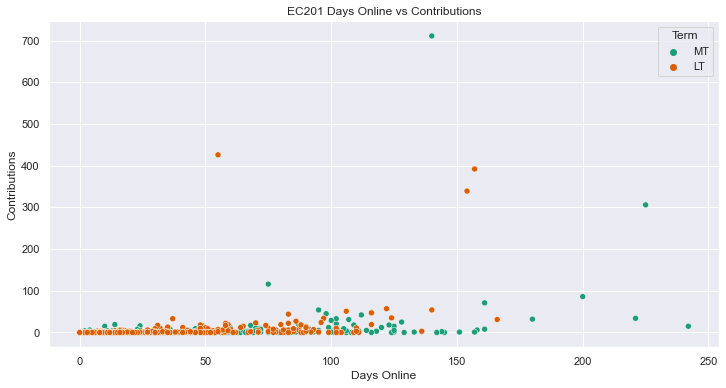

In [23]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='Term', data=EC201_combine)

plt.title("EC201 Days Online vs Contributions")

plt.xlabel("Days Online")
plt.ylabel("Contributions")

plt.show()


## EC210 LT AND ST

In [27]:
#import dataset
EC210_LT = pd.read_excel('EC210 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC210_LT.columns = EC210_LT.iloc[0]
EC210_LT = EC210_LT.drop(0)
EC210_LT = EC210_LT.drop('groups', axis =1)
EC210_LT = EC210_LT.fillna(0)


EC210_LT.head()


,role,days online,posts,answers,edits to answers,followups,replies to followups
1,instructor,121,1,73,31,0,7
2,instructor,43,0,39,6,0,5
3,instructor,41,0,16,0,1,4
4,instructor,100,0,74,9,2,44
5,instructor,11,0,38,4,0,4


In [31]:
EC210_LT['days online'] = EC210_LT['days online'].astype(int)
EC210_LT['posts'] = EC210_LT['posts'].astype(int)
EC210_LT['answers'] = EC210_LT['answers'].astype(int)
EC210_LT['edits to answers'] = EC210_LT['edits to answers'].astype(int)
EC210_LT['followups'] = EC210_LT['followups'].astype(int)
EC210_LT['replies to followups'] = EC210_LT['replies to followups'].astype(int)

EC210_LT.drop('role', axis=1).describe()

,days online,posts,answers,edits to answers,followups,replies to followups
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,21.093023,1.360465,1.544186,0.458140,0.423256,0.460465
std,24.823399,4.544811,7.738238,2.518346,1.713084,2.614657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.750000,1.000000,0.000000,0.000000,0.000000,0.000000
max,132.000000,51.000000,74.000000,31.000000,17.000000,44.000000


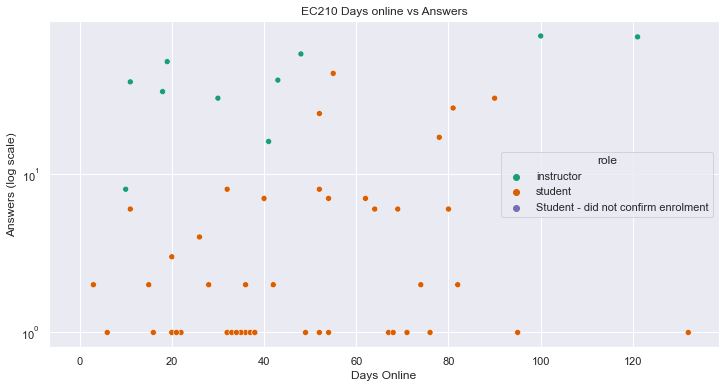

In [33]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC210_LT)

plt.title("EC210 Days online vs Answers")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


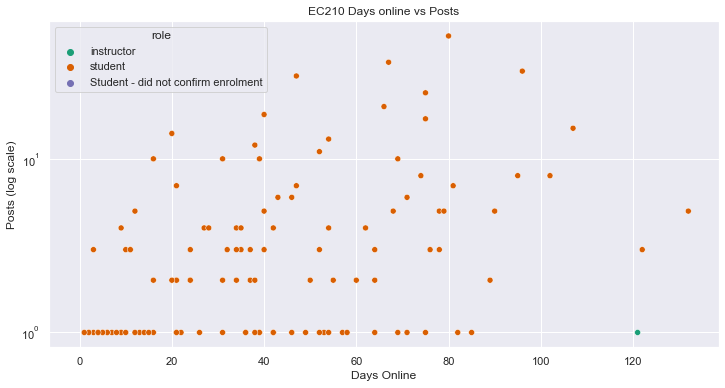

In [35]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="posts", hue='role', data=EC210_LT)

plt.title("EC210 Days online vs Posts")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Posts (log scale)")

plt.show()
